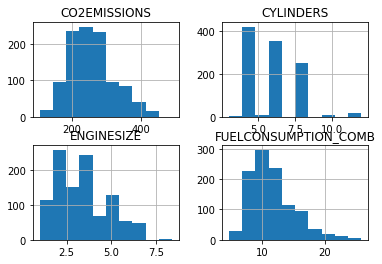

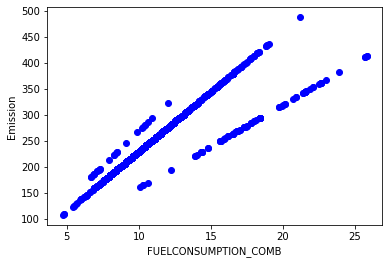

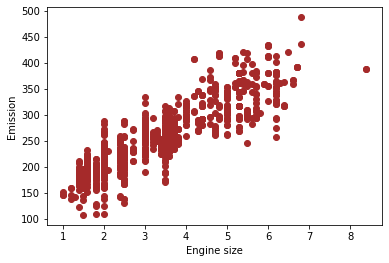

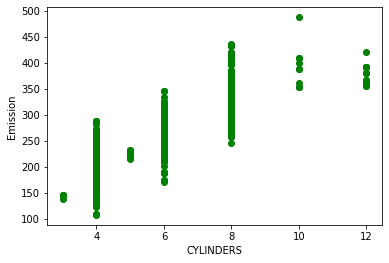

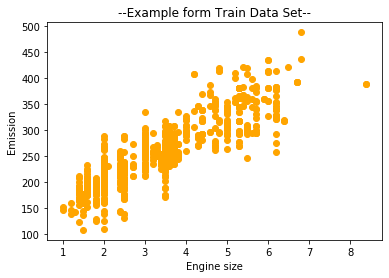

Coefficients:  [[39.50991429]]
Intercept:  [124.15589528]


Mean absolute error: 21.74
Residual sum of squares (MSE): 807.28
R2-score: 0.75


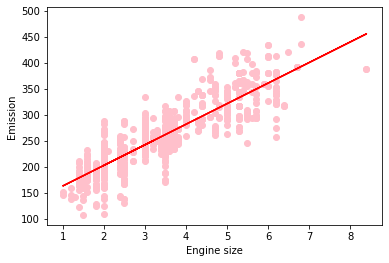

In [11]:
###############################################################################################################################
############################################## Simple Linear Regression #######################################################
###############################################################################################################################

# ABOUT THIS NOTEBOOK:
# In this notebook, we will use scikit-learn to implement simple linear regression. We download a dataset that is related to 
# fuel consumption and Carbon dioxide emission of cars. Then, we split our data into training and test sets, create a model 
# using training set, Evaluate your model using test set, and finally use model to predict unknown value.

# Importing Needed packages:
import matplotlib.pyplot as plt
import pandas as pd
import pylab as pl
import numpy as np
from sklearn import linear_model
from sklearn.metrics import r2_score
%matplotlib inline

# Downloading Data:
url='https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/FuelConsumptionCo2.csv'

# Understanding the Data: 
# We have downloaded a fuel consumption dataset, FuelConsumption.csv, which contains model-specific fuel consumption ratings 
# and estimated carbon dioxide emissions for new light-duty vehicles for retail sale in Canada.
# MODELYEAR e.g. 2014
# MAKE e.g. Acura
# MODEL e.g. ILX
# VEHICLE CLASS e.g. SUV
# ENGINE SIZE e.g. 4.7
# CYLINDERS e.g 6
# TRANSMISSION e.g. A6
# FUEL CONSUMPTION in CITY(L/100 km) e.g. 9.9
# FUEL CONSUMPTION in HWY (L/100 km) e.g. 8.9
# FUEL CONSUMPTION COMB (L/100 km) e.g. 9.2
# CO2 EMISSIONS (g/km) e.g. 182 --> low --> 0

# Reading the data:
df = pd.read_csv(url)
df.head()

# Data Exploration:
# summarize the data
df.describe()

#Lets select some features to explore more:
cdf = df[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB','CO2EMISSIONS']]
cdf.head(9)

# we can plot each of these fearues:
viz = cdf[['CYLINDERS','ENGINESIZE','CO2EMISSIONS','FUELCONSUMPTION_COMB']]
viz.hist()
plt.show()

# Now, lets plot each of these features vs the Emission, to see how linear is their relation:

# Plot of FUELCONSUMPTION_COMB Vs. CO2EMISSIONS:
plt.scatter(cdf.FUELCONSUMPTION_COMB, cdf.CO2EMISSIONS,  color='blue')
plt.xlabel("FUELCONSUMPTION_COMB")
plt.ylabel("Emission")
plt.show()

# Plot of ENGINESIZE Vs. CO2EMISSIONS:
plt.scatter(cdf.ENGINESIZE, cdf.CO2EMISSIONS,  color='brown')
plt.xlabel("Engine size")
plt.ylabel("Emission")
plt.show()

# Plot of CYLINDERS Vs. CO2EMISSIONS:
plt.scatter(cdf.CYLINDERS, cdf.CO2EMISSIONS,  color='green')
plt.xlabel("CYLINDERS")
plt.ylabel("Emission")
plt.show()

# Creating train and test dataset:
# Lets split our dataset into train and test sets, 80% of the entire data for training, and the 20% for testing. 
# We create a mask to select random rows using np.random.rand() function:
msk = np.random.rand(len(df)) < 0.8
train = cdf[msk]
test = cdf[~msk]

# Simple Regression Model:
# Linear Regression fits a linear model with coefficients B = (B1, ..., Bn) to minimize the 'residual sum of squares' 
# between the independent x in the dataset, and the dependent y by the linear approximation.

# Train data distribution:
plt.scatter(train.ENGINESIZE, train.CO2EMISSIONS,  color='orange')
plt.xlabel("Engine size")
plt.ylabel("Emission")
plt.title("--Example form Train Data Set--")
plt.show()

# Modeling
# Using sklearn package to model data.
regr = linear_model.LinearRegression()
train_x = np.asanyarray(train[['ENGINESIZE']])
train_y = np.asanyarray(train[['CO2EMISSIONS']])
regr.fit (train_x, train_y)
# The coefficients
print ('Coefficients: ', regr.coef_)
print ('Intercept: ',regr.intercept_)

# Plot outputs:
plt.scatter(train.ENGINESIZE, train.CO2EMISSIONS,  color='pink')
plt.plot(train_x, regr.coef_[0][0]*train_x + regr.intercept_[0], '-r')
plt.xlabel("Engine size")
plt.ylabel("Emission")

# Evaluation:
# we compare the actual values and predicted values to calculate the accuracy of a regression model. 
# Evaluation metrics provide a key role in the development of a model, as it provides insight to areas that require improvement.
test_x = np.asanyarray(test[['ENGINESIZE']])
test_y = np.asanyarray(test[['CO2EMISSIONS']])
test_y_Reg = regr.predict(test_x)

print("\n")
print("Mean absolute error: %.2f" % np.mean(np.absolute(test_y_Reg - test_y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((test_y_Reg - test_y) ** 2))
print("R2-score: %.2f" % r2_score(test_y_Reg , test_y) )
